<a href="https://colab.research.google.com/github/jfink09/Deep-Learning/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch workflow

Example of PyTorch end-to-end workflow

Resources:
* Ground truth notebook -
* Book version of notebook -
* Ask question - 

In [1]:
what_we_are_covering = {1: "data (prepare and load the model)",
                        2: "build. model",
                        3: "fitting the model to data (training)",
                        4: "making predictions and evaluating the model (inference)",
                        5: "saving and loading a model",
                        6: "putting it all together"}

what_we_are_covering

{1: 'data (prepare and load the model)',
 2: 'build. model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

## 1. Data (preparing and loading)

Data can be almost anything in ML

* Excel spreadsheet
* Images of any kind
* Videos
* Audio (songs or podcasts)
* DNA
* Text

ML is a game of two parts:

1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, create some *known* data using the linear regression formula:

Y_i=f(X_i, \beta)+e_i or y = mx + b

Slope = gradient

Use a linear regression to make a straight line with *known* **parameters**.


In [3]:
# Create a known parameter
weight = 0.7 # m (slope)
bias = 0.3 # b (y-intercept)

# build a model to estimate the weights and biases
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) # Unsqueezed adds an extra dimension (an extra square bracket around all of the values)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important part of ML)

Training set (course material) -> validation set (practice test) -> test set (actual test)

Generalization - The ability for ML model to perform well on data it has not seen before.

Create a training and test set with our data.

In [5]:
# Create the train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Better visualize the data with Matplotlib

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

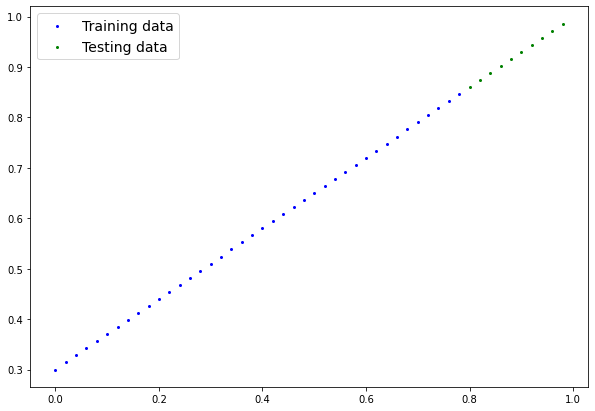

In [8]:
plot_predictions();

# prsctce casper, finish gw, read, piano
# Build first PyTorch model

What the model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values used to create the data)

It does this through two main algorithms:
1. Gradient descent
2. Backpropagation

In [9]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module since it contains all of the building blocks for NNs
  def __init__(self):
    super().__init__()

    # Initialize model parameters to be used in various computations (can be different layers from torch.nn, single parameters, hard-coded values, or functions)
    self.weights = nn.Parameter(torch.randn(1, # Start with random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # requires_grad set to True for gradient descent to update the parameter
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, # Start with random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # requires_grad set to True for gradient descent to update the parameter
                                         dtype=torch.float))
    
  # Forward method to define the computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights*x + self.bias # Linear regression formula

# In gradient descent, PyTorch tracks the gradients of the specific parameter for use with torch.autograd and gradient descent
# Any subclass of nn.Module needs to override forward() which defines the forward computation of the model

### PyTorch model building essentials

* torch.nn contains the building blocks for computational graphs (NNs)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all NN modules, if you subclass it, you should overwrite forward()
* torch.optim - optimizers in PyTorch help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward() which defines what happens in the forward computation

### Checking the contents of the PyTorch model

Check out the model's parameters or what is inside the model using `.parameters()`

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is the subclass of nn.Module)
model_0 = LinearRegressionModel()

# CHeck out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict() # Dictionary of the parameters of the model (weights and bias)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_model()`

To check the model's predictive power, see how well it predicts `y_test` based on `X_test`

When we pass data through the model, it is going to run it through the forward() method.

In [12]:
# Need to bring the [0.3367] and the [0.1288] as close as possible to the known values of 0.7 and 0.3 respectively
weight, bias

(0.7, 0.3)

In [13]:
X_test, y_test # Take the X_test values as input and make the y_test values as output

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [15]:
# Make predictions with model
with torch.inference_mode(): # inference_mode helps keep the programming running faster by not keeping track of the gradient
  y_preds = model_0(X_test)

# no_grad() is similar, but inference_mode() is preferred
"""with torch.no_grad():
  y_preds = model_0(X_test)
"""

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

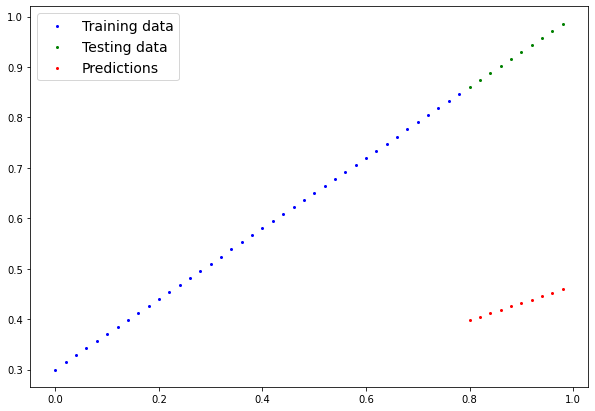

In [17]:
plot_predictions(predictions=y_preds)

# 3. Train the model

Training is for a model to move from some *unknown* parameters (which may be random) to some  *known* parameters

From a poor representation of the data to a better representation of the data.

To measure how poorly or wrong a model predition is, is to use a loss function.

* Note loss function is also a cost function or criterion in different areas.


Things we need to train:

* **Loss function:** A function to measure how wrong the model's predictions are to the ideal outputs (the lower the better).

* **Optimizer** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
# Show the model's parameters (parameters are values the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
# Setup a loss function
loss_fn = nn.L1Loss() # Tells us how wrong the model is

# Setup an optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), # Works with the parameters to minimize the loss function
                            lr=0.01)  # Learning rate that changes the parameter by the LR value to find the direction it needs to go to minimize loss

### Building a training loop and a testing loop in PyTorch

A couple things we need in a training loop:
0. Loop through the data (look through the data multiple times to make predictions based on random values)
1. Forward pass (data moving through the model's `forward()` functions to make predictions on the data (also called forward propagtion)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to improve the loss (**gradient descent**). The gradient is essentially the slope (dy/dx).

In [21]:
torch.manual_seed(42)

# An epoch is one loop through the data (hyperparameter because we set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. loop through the data
for epoch in range(epochs):
  # Set the model to training mode (default)
  model_0.train() # Train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the MAE loss (distance between red dot and green dot)
  loss = loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimzer (perform gradient descent)
  optimizer.step() # By default how the optimizer changes will accumulate through the loop, so we have to zero them above in step 3 for the next iteration of the loop

  # Testing
  model_0.eval() # Turns off gradient tracking no needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking and other behind the scenes things can do with torch.no_grad(), but not as fast as inference mode
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  # Print out what is happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}")

    print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Test: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Test: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Test: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

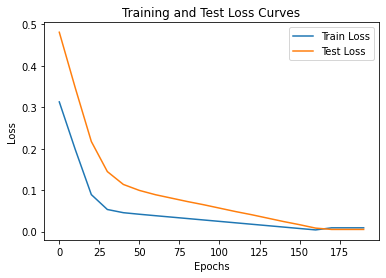

In [23]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [24]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

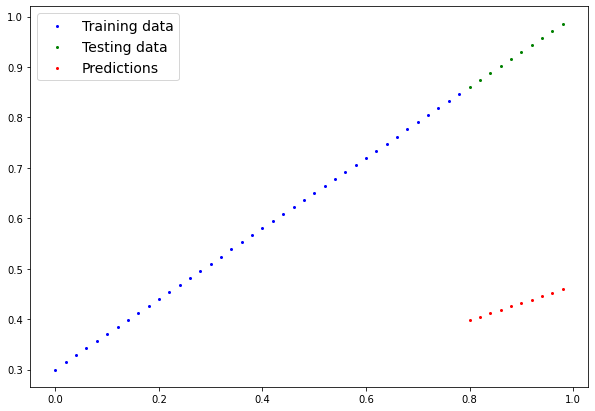

In [26]:
plot_predictions(predictions=y_preds);

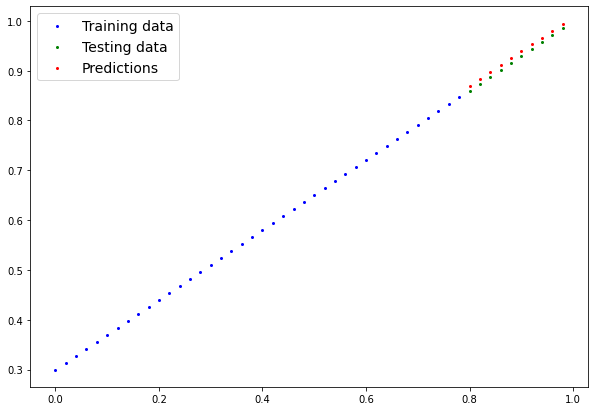

In [27]:
plot_predictions(predictions=y_preds_new);

### Saving a model in PyTorch

Three main methods for saving/loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a PyTorch project
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

In [28]:
# Save the model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_python_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")

Saving the model to: models/01_python_workflow_model_0.pth
